In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def add_month_yr(x):
    '''
    Add a new column using Timestamp column

    '''
    import pandas as pd
    assert isinstance(x, pd.DataFrame)
    dict = {'01' : 'Jan', '02' : 'Feb','03' : 'Mar','04' : 'Apr','05' : 'MAY','06' : 'Jun','07' : 'Jul','08' : 'Aug','09' : 'Sep','10' : 'Oct','11' : 'Nov','12' : 'Dec'}
    new_list = []
    for each in x['Time']:
        l = each.split('/')
        a = dict[l[1]]
        b = l[0]
        text =  "{}-{}".format(a,b)
        new_list.append(text)
        
    x['month-yr'] = new_list
    
    return x

In [3]:
def fix_categorical(x):
    '''
    Using functools to sort the list, and then covert required x column into categorical type.
    '''
    import pandas as pd
    from functools import cmp_to_key
    assert isinstance(x, pd.DataFrame)
    # first define how to string compare to each other
    def compare(item1, item2):
        l1 = item1.split('-')
        l2 = item2.split('-')
        item1 = [month2number[l1[0]], int(l1[1])]
        item2 = [month2number[l2[0]], int(l2[1])]
        if item1[1] < item2[1]:
            return -1
        elif item1[1] > item2[1]:
            return 1
        else:
            if item1[0] < item2[0]:
                return -1
            elif item1[0] > item2[0]:
                return 1
            else:
                return 0
    
    month2number = {'Jan' : 1, 'Feb' : 2,'Mar' : 3,'Apr' : 4,'MAY' : 5,'Jun' : 6,'Jul' : 7,'Aug' : 8,'Sep' : 9,'Oct' : 10,'Nov' : 11,'Dec' : 12}
    storage = set(x['month-yr'].values)
    
    sorted_list = sorted(storage, key=cmp_to_key(compare))
    t = pd.CategoricalDtype(categories=sorted_list, ordered=True)
    x['month-yr'] = pd.Categorical(x['month-yr'], dtype = t)
    
    return x

In [4]:
df = pd.read_csv('data.csv')
df = fix_categorical(add_month_yr(df))

([<matplotlib.axis.XTick at 0x1f13db03bb0>,
 [Text(1, 0, 'Negative'), Text(2, 0, 'Neutral'), Text(3, 0, 'Positive')])

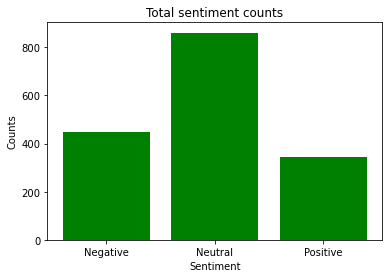

In [6]:
x_label_totalSentiment = ['Negative', 'Neutral', 'Positive']
x_value = [1,2,3]
plt.bar(x_value, list(df.groupby('Sentiment')['ID'].count()), color='green')
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.title("Total sentiment counts")

plt.xticks(x_value, x_label_totalSentiment)

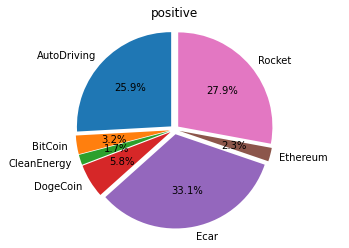

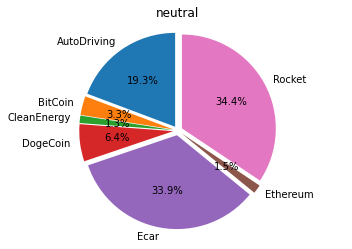

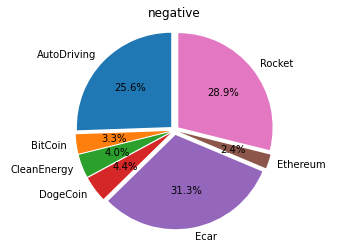

In [7]:
class_list = ['AutoDriving', 'BitCoin', 'CleanEnergy', 'DogeCoin', 'Ecar', 'Ethereum', 'Rocket']
postive_data = []
neutral_data = []
negative_data = []

for name,group in df.groupby(['Sentiment', 'Class']):
    if name[0] == 'Negative':
        negative_data.append(group['ID'].count())
    elif name[0] == 'Neutral':
        neutral_data.append(group['ID'].count())
    else:
        postive_data.append(group['ID'].count())

        
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(postive_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('positive')

fig1, ax2 = plt.subplots()
ax2.pie(neutral_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('neutral')

fig1, ax3 = plt.subplots()
ax3.pie(negative_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('negative')

plt.show()

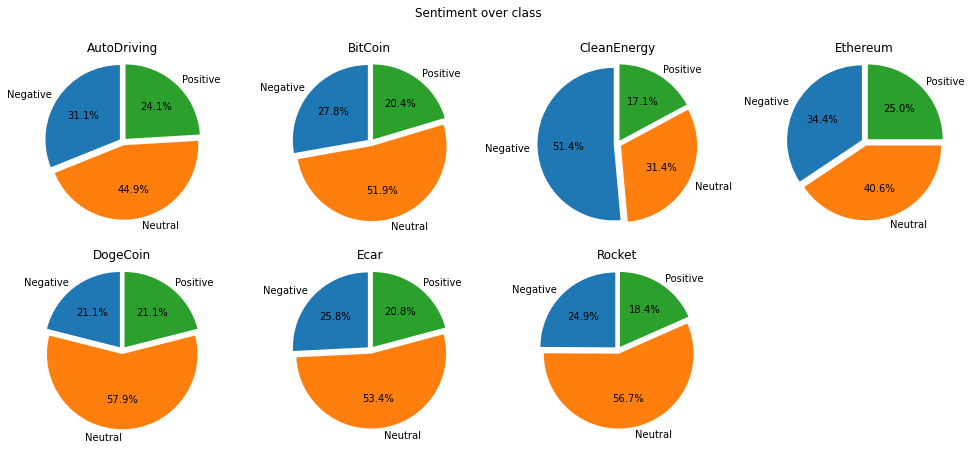

In [8]:
class_list = ['Negative','Neutral', 'Positive']
AutoDriving_data = []
BitCoin_data = []
CleanEnergy_data = []
DogeCoin_data = []
Ecar_data = []
Ethereum_data = []
Rocket_data = []

for name,group in df.groupby(['Sentiment', 'Class']):
    if name[1] == 'AutoDriving':
        AutoDriving_data.append(group['ID'].count())
    elif name[1] == 'BitCoin':
        BitCoin_data.append(group['ID'].count())
    elif name[1] == 'CleanEnergy':
        CleanEnergy_data.append(group['ID'].count())
    elif name[1] == 'DogeCoin':
        DogeCoin_data.append(group['ID'].count())
    elif name[1] == 'Ecar':
        Ecar_data.append(group['ID'].count())
    elif name[1] == 'Ethereum':
        Ethereum_data.append(group['ID'].count())
    else:
        Rocket_data.append(group['ID'].count())
    


        
explode = (0.05, 0.05, 0.05)

fig, axs = plt.subplots(2, 4, figsize=(17, 7))
axs[0][0].pie(AutoDriving_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[0][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0][0].set_title('AutoDriving')

#fig2, ax2 = plt.subplots()
axs[0][1].pie(BitCoin_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[0][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0][1].set_title('BitCoin')

#fig3, ax3 = plt.subplots()
axs[0][2].pie(CleanEnergy_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[0][2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0][2].set_title('CleanEnergy')

#fig4, ax4 = plt.subplots()
axs[0][3].pie(Ethereum_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[0][3].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0][3].set_title('Ethereum')

#fig5, ax5 = plt.subplots()
axs[1][0].pie(DogeCoin_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[1][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1][0].set_title('DogeCoin')

#fig6, ax6 = plt.subplots()
axs[1][1].pie(Ecar_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[1][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1][1].set_title('Ecar')

#fig7, ax7 = plt.subplots()
axs[1][2].pie(Rocket_data, explode=explode, labels=class_list, autopct='%1.1f%%',
        shadow=False, startangle=90)
axs[1][2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1][2].set_title('Rocket')

axs[1][3].set_visible(False)

fig.suptitle('Sentiment over class')
plt.show()

([<matplotlib.axis.XTick at 0x1f13e4467c0>,
 [Text(1, 0, 'AutoDriving'),
  Text(2, 0, 'BitCoin'),
  Text(3, 0, 'CleanEnergy'),
  Text(4, 0, 'DogeCoin'),
  Text(5, 0, 'Ecar'),
  Text(6, 0, 'Ethereum'),
  Text(7, 0, 'Rocket')])

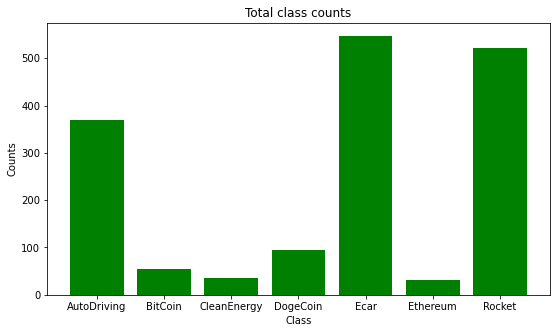

In [9]:
x_label_totalSentiment = ['AutoDriving', 'BitCoin', 'CleanEnergy', 'DogeCoin', 'Ecar', 'Ethereum', 'Rocket']
x_value = [1,2,3,4,5,6,7]
plt.figure(figsize=(9,5))
plt.bar(x_value, list(df.groupby('Class')['ID'].count()), color='green')
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Total class counts")

plt.xticks(x_value, x_label_totalSentiment)

In [10]:
AutoDriving_data = []
BitCoin_data = []
CleanEnergy_data = []
DogeCoin_data = []
Ecar_data = []
Ethereum_data = []
Rocket_data = []
year_list = ['Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22']
x_value = [1,2,3,4,5,6,7,8,9,10,11]
new_df = df.groupby(['month-yr', 'Class']).count().unstack(fill_value=0).stack()
for name,group in new_df.groupby(['month-yr', 'Class']):
    if name[1] == 'AutoDriving':
        AutoDriving_data.append(group['ID'].values)
    elif name[1] == 'BitCoin':
        BitCoin_data.append(group['ID'].values)
    elif name[1] == 'CleanEnergy':
        CleanEnergy_data.append(group['ID'].values)
    elif name[1] == 'DogeCoin':
        DogeCoin_data.append(group['ID'].values)
    elif name[1] == 'Ecar':
        Ecar_data.append(group['ID'].values)
    elif name[1] == 'Ethereum':
        Ethereum_data.append(group['ID'].values)
    else:
        Rocket_data.append(group['ID'].values)

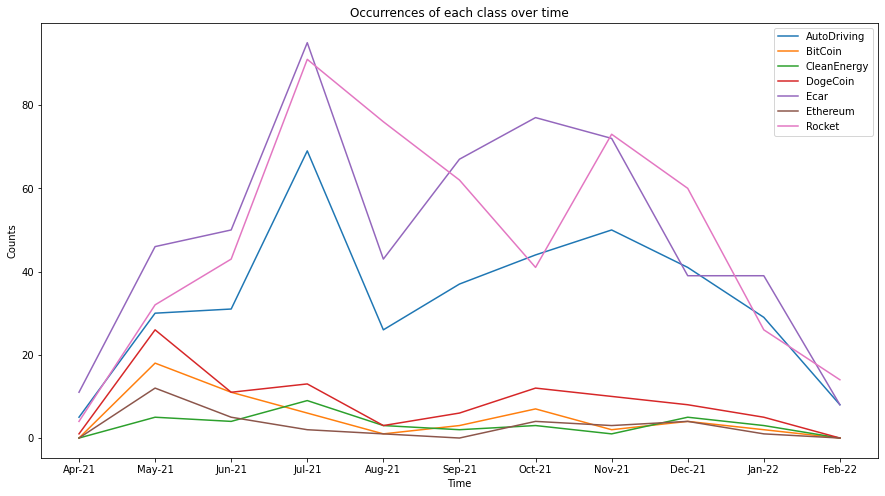

In [11]:
plt.figure(figsize=(15,8))
plt.plot(x_value,AutoDriving_data , label='AutoDriving')
plt.plot(x_value,BitCoin_data , label='BitCoin')
plt.plot(x_value,CleanEnergy_data , label='CleanEnergy')
plt.plot(x_value,DogeCoin_data , label='DogeCoin')
plt.plot(x_value,Ecar_data , label='Ecar')
plt.plot(x_value,Ethereum_data , label='Ethereum')
plt.plot(x_value,Rocket_data , label='Rocket')
plt.title('Occurrences of each class over time')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(x_value, year_list)
plt.show()